In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
original = pd.read_csv('Salary Survey from AskAManager.org.csv', sep=',', decimal='.')

In [3]:
df = original.copy(deep=True)

In [4]:
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


### Tratamento Geral das Colunas

In [5]:
df.rename(columns = {'How old are you?':'Age', 'What industry do you work in?':'work_industry', "What is your annual salary? \
(You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent \
-- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":"annual_salary", 'How much additional monetary \
compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation \
here, not the value of benefits.':'additional_monetary_compensation', 'Please indicate the currency':'currency', 'What country \
do you work in?':'country', "If you're in the U.S., what state do you work in?":"state_(US)", "What city do you work in?":"city" \
, "How many years of professional work experience do you have overall?":"overall_work_exp.", "How many years of \
professional work experience do you have in your field?":'fieldwork _exp.', "What is your highest level of \
education completed?":"level_of_education", "What is your gender?":"gender", "What is your race? (Choose all that apply.)":"race" \
, "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please \
only include monetary compensation here, not the value of benefits.":"additional_monetary_compensation", "If your income needs \
additional context, please provide it here:":"additional_income _context",'If "Other," please indicate the currency here: ':"other_currencies"},
         inplace=True)

In [6]:
df.drop([['If your job title needs additional context, please clarify here:', 
          'additional_income _context', 
          'additional_monetary_compensation', 
          'other_currencies']], axis = 1, inplace=True)
          
#Essas colunas apresentam uma inconsistência muito grande na sua coleta de dados, obtendo entradas de texto de entrevistados 
#explicando o contexto e entrada de valores em si. Como são colunas de certa forma arbitrárias, resolvi desconsiderá-las.

In [7]:
df.drop(['Timestamp'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27779 entries, 0 to 27778
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 27779 non-null  object
 1   Work Industry       27709 non-null  object
 2   Job title           27779 non-null  object
 3   Annual Salary       27779 non-null  object
 4   Currency            27779 non-null  object
 5   Country             27779 non-null  object
 6   State (US)          22840 non-null  object
 7   City                27704 non-null  object
 8   Overall Work Exp.   27779 non-null  object
 9   Fieldwork Exp.      27779 non-null  object
 10  Level of Education  27569 non-null  object
 11  Gender              27614 non-null  object
 12  Race                27615 non-null  object
dtypes: object(13)
memory usage: 2.8+ MB


### Ánalise Coluna "Currency"

In [9]:
df['Currency'].value_counts(normalize=True)

USD        0.833723
CAD        0.059613
GBP        0.056662
EUR        0.022679
AUD/NZD    0.017927
Other      0.005256
CHF        0.001332
SEK        0.001332
JPY        0.000828
ZAR        0.000504
HKD        0.000144
Name: Currency, dtype: float64

In [10]:
#Como a grande maioria dos salários são em dólar, limitei a análise a esses participantes. 
df = df.loc[(df['Currency'] == 'USD'), :]

### Análise Coluna "Annual Salary"

In [ ]:
df.head()

In [11]:
df['Annual Salary'] = df['Annual Salary'].str.replace(',','')
df['Annual Salary'] = df['Annual Salary'].str.replace('.','')
df['Annual Salary'] = df['Annual Salary'].astype(float)

In [13]:
df['Annual Salary'].isnull().sum()

0

In [14]:
df['Annual Salary'].describe()

count    2.316000e+04
mean     9.649106e+04
std      6.735750e+05
min      0.000000e+00
25%      5.609050e+04
50%      7.850000e+04
75%      1.120000e+05
max      1.020000e+08
Name: Annual Salary, dtype: float64

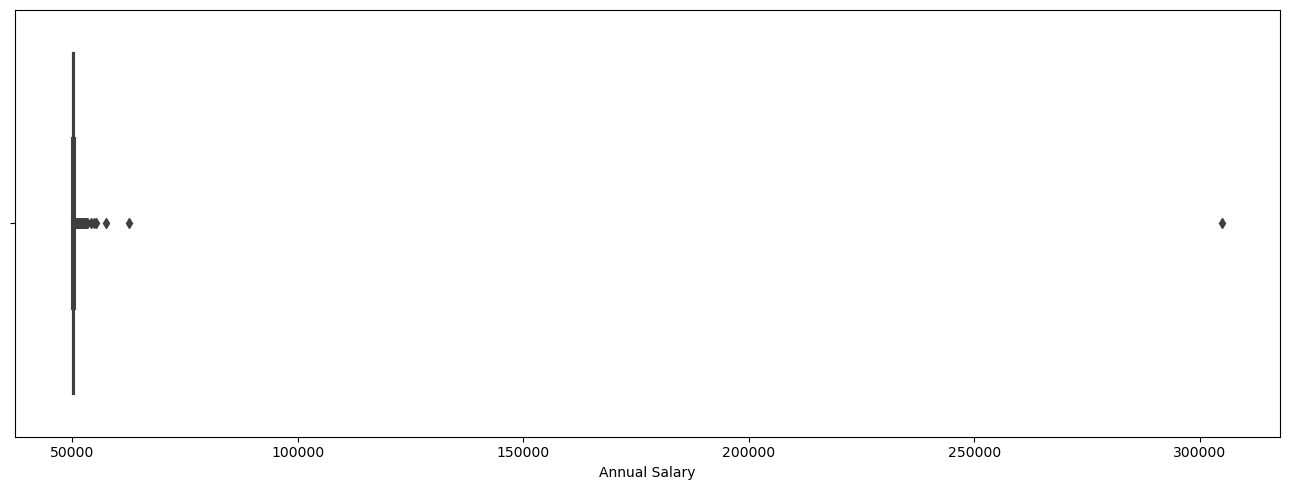

In [15]:
#Percebe-se que os dados têm outliers severos.
fig, ax = plt.subplots(figsize=(13,5))
ax = sns.boxplot(x=df['Annual Salary'])
ax.set_xticklabels(np.arange(0,750000,50000))
plt.tight_layout()

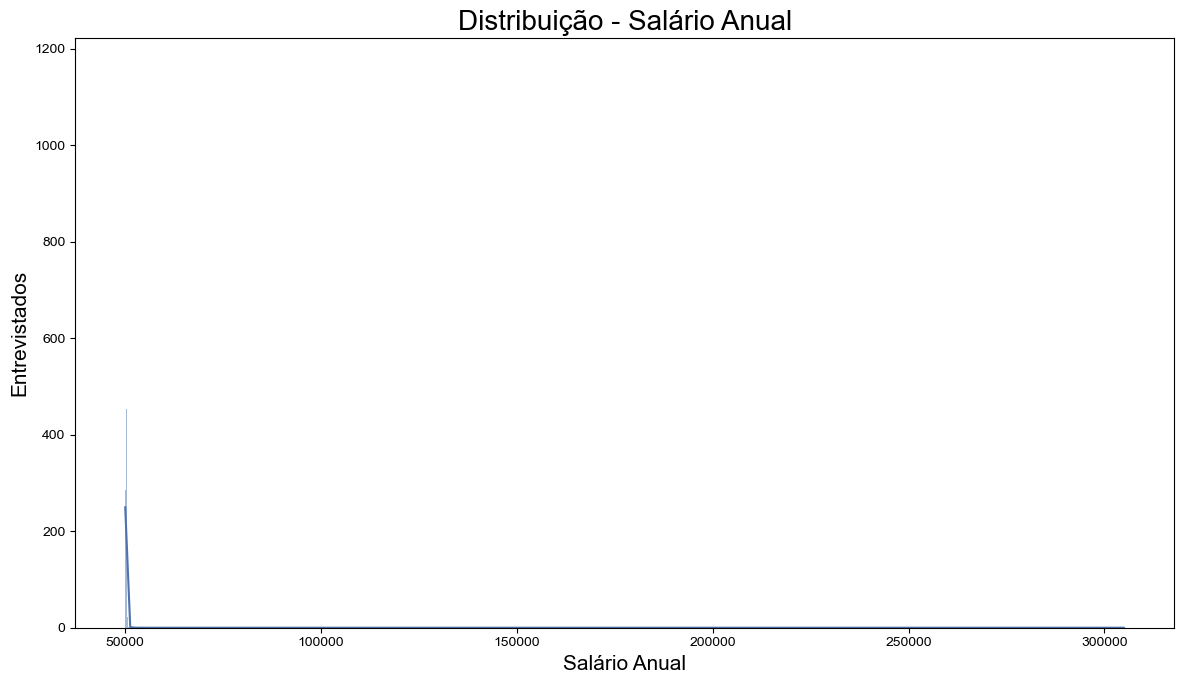

In [16]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_theme(style='white', font='verdana')
ax = sns.histplot(x=df['Annual Salary'], kde=True)
ax.set_title('Distribuição - Salário Anual', fontsize=20)
ax.set_xlabel('Salário Anual', fontsize=15)
ax.set_ylabel('Entrevistados', fontsize=15)
ax.set_xticklabels(np.arange(0,500000,50000))

plt.tight_layout()

### Análise Coluna "Gender"

In [17]:
df['Gender'].value_counts(dropna=False, normalize=True).mul(100)

Woman                            77.469775
Man                              18.380829
Non-binary                        2.564767
Other or prefer not to answer     0.988774
NaN                               0.591537
Prefer not to answer              0.004318
Name: Gender, dtype: float64

In [18]:
df['Gender'].replace({'Prefer not to answer': 'Other or prefer not to answer'}, inplace= True) 

In [19]:
df['Gender'].value_counts(dropna=False, normalize=True).mul(100)

Woman                            77.469775
Man                              18.380829
Non-binary                        2.564767
Other or prefer not to answer     0.993092
NaN                               0.591537
Name: Gender, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Gender'>

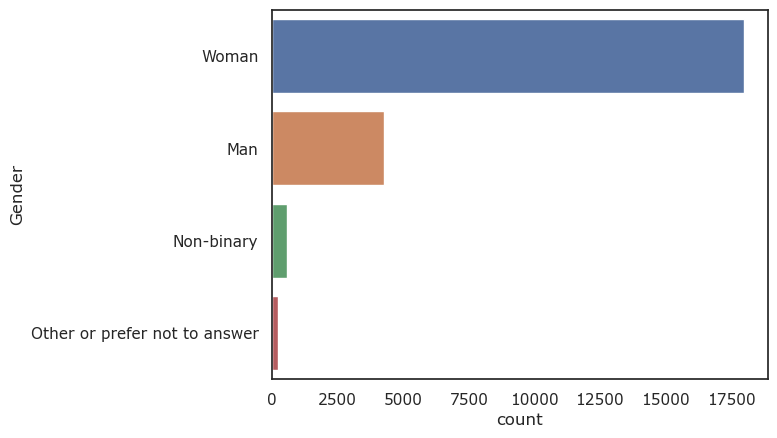

In [20]:
sns.countplot(y= df['Gender'])

### Análise Coluna "Race"

In [21]:
df['Race'].value_counts()

White                                                                                                                            19142
Asian or Asian American                                                                                                           1113
Black or African American                                                                                                          595
Hispanic, Latino, or Spanish origin                                                                                                534
Another option not listed here or prefer not to answer                                                                             461
Hispanic, Latino, or Spanish origin, White                                                                                         359
Asian or Asian American, White                                                                                                     300
Black or African American, White                       

In [22]:
df['Race'] = df['Race'].str.replace('Hispanic, Latino, or Spanish origin, White', 'Hispanic, Latino, or Spanish origin')
df['Race'] = df['Race'].str.replace('Asian or Asian American, White', 'Asian or Asian American') 
df['Race'] = df['Race'].str.replace('Black or African American, White', 'Black or African American') 
df['Race'] = df['Race'].str.replace('Middle Eastern or Northern African, White', 'Middle Eastern or Northern African')
df['Race'] = df['Race'].str.replace('Native American or Alaska Native, White', 'Native American or Alaska Native')
df['Race'] = df['Race'].str.replace('White, Another option not listed here or prefer not to answer', 'White')
df['Race'] = df['Race'].str.replace('Black or African American, Hispanic, Latino, or Spanish origin', 'Black or African American')
df['Race'] = df['Race'].str.replace('Asian or Asian American, Hispanic, Latino, or Spanish origin', 'Asian or Asian American')
df['Race'] = df['Race'].str.replace('Asian or Asian American, Hispanic, Latino, or Spanish origin, White', 'White')
df['Race'] = df['Race'].str.replace('Black or African American, Hispanic, Latino, or Spanish origin, White', 'White')
df['Race'] = df['Race'].str.replace('Hispanic, Latino, or Spanish origin, Native American or Alaska Native, White', 'White')
df['Race'] = df['Race'].str.replace('Hispanic, Latino, or Spanish origin, Native American or Alaska Native', 'Hispanic, Latino, or Spanish origin')
df['Race'] = df['Race'].str.replace('Asian or Asian American, Black or African American', 'Black or African American')
df['Race'] = df['Race'].str.replace('Asian or Asian American, Middle Eastern or Northern African', 'Middle Eastern or Northern African')
df['Race'] = df['Race'].str.replace('Hispanic, Latino, or Spanish origin, Another option not listed here or prefer not to answer', 'Hispanic, Latino, or Spanish origin')

df['Race'].value_counts()

White                                                                                              19178
Asian or Asian American                                                                             1439
Hispanic, Latino, or Spanish origin                                                                  919
Black or African American                                                                            758
Another option not listed here or prefer not to answer                                               461
Middle Eastern or Northern African                                                                   136
Native American or Alaska Native                                                                      88
Asian or Asian American, Another option not listed here or prefer not to answer                       13
Black or African American, Native American or Alaska Native                                            7
Asian or Asian American, Native American or Alaska Nati

In [23]:
#Com o objetivo de eliminar a redundância, ambiguidade e a cardinalidade, removeremos algumas categorias acima. Essas possuem pequeno volume,
#não gerando um impacto significativo.

df = df.loc[(df['Race'] != 'Black or African American, Native American or Alaska Native') & (df['Race'] != 
    'Asian or Asian American, Native American or Alaska Native') & (df['Race'] != 
    'Black or African American, Middle Eastern or Northern African') & (df['Race'] != 
    'Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African') & (df['Race'] != 
    'Black or African American, Middle Eastern or Northern African, Native American or Alaska Native') & (df['Race'] !=
    'Black or African American, Another option not listed here or prefer not to answer') & (df['Race'] !=
    'Middle Eastern or Northern African, Native American or Alaska Native') & (df['Race'] != 
    'Middle Eastern or Northern African, Another option not listed here or prefer not to answer') & (df['Race'] != 
    'Asian or Asian American, Another option not listed here or prefer not to answer'), :]

df['Race'].value_counts(normalize=True).mul(100)

White                                                     83.458810
Asian or Asian American                                    6.262239
Hispanic, Latino, or Spanish origin                        3.999304
Black or African American                                  3.298664
Another option not listed here or prefer not to answer     2.006180
Middle Eastern or Northern African                         0.591845
Native American or Alaska Native                           0.382958
Name: Race, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Race'>

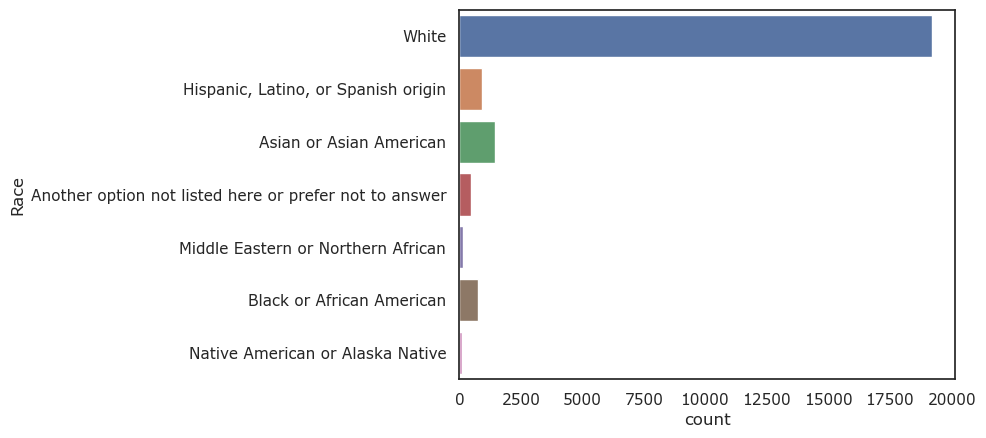

In [24]:
sns.countplot(y= df['Race'])

### Análise Coluna "Level of Education"

In [25]:
df['Level of Education'].value_counts(dropna=False, normalize=True).mul(100)

College degree                        48.522860
Master's degree                       32.311086
Some college                           6.976945
Professional degree (MD, JD, etc.)     4.909382
PhD                                    4.879104
High School                            1.751806
NaN                                    0.648817
Name: Level of Education, dtype: float64

In [26]:
df['Level of Education'] = df['Level of Education'].str.replace('Some college', 'College degree')
df['Level of Education'].value_counts()

College degree                        12831
Master's degree                        7470
Professional degree (MD, JD, etc.)     1135
PhD                                    1128
High School                             405
Name: Level of Education, dtype: int64

In [27]:
df['Level of Education'] = pd.Categorical(df['Level of Education'], categories= ['High School',
                            'Professional degree (MD, JD, etc.)', 'College degree', "Master's degree", 'PhD'])

In [28]:
df['Level of Education'].value_counts(dropna=False, normalize=True).mul(100)

College degree                        55.499805
Master's degree                       32.311086
Professional degree (MD, JD, etc.)     4.909382
PhD                                    4.879104
High School                            1.751806
NaN                                    0.648817
Name: Level of Education, dtype: float64

### Análise Coluna "Fieldwork Exp." 

In [29]:
df['Fieldwork Exp.'].value_counts(dropna=False, normalize=True).mul(100)

11 - 20 years       23.725075
5-7 years           23.422293
2 - 4 years         21.480168
8 - 10 years        18.123621
21 - 30 years        6.777975
1 year or less       4.900731
31 - 40 years        1.427397
41 years or more     0.142740
Name: Fieldwork Exp., dtype: float64

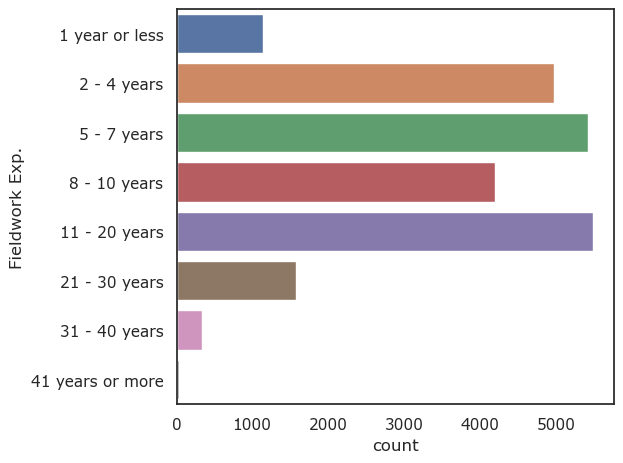

In [30]:
df['Fieldwork Exp.'] = df['Fieldwork Exp.'].str.replace('5-7 years', '5 - 7 years')
df['Fieldwork Exp.'] = pd.Categorical(df['Fieldwork Exp.'], categories = ['1 year or less','2 - 4 years','5 - 7 years', 
                                        '8 - 10 years', '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more'])

sns.countplot(y= df['Fieldwork Exp.'])
plt.tight_layout()

### Análise Coluna "Overall Work Exp." 

In [31]:
df['Overall Work Exp.'].value_counts(dropna=False, normalize=True).mul(100)

11 - 20 years       34.945283
8 - 10 years        19.096847
5-7 years           17.133094
21 - 30 years       13.132056
2 - 4 years         10.355119
31 - 40 years        3.157576
1 year or less       1.708551
41 years or more     0.471474
Name: Overall Work Exp., dtype: float64

In [32]:
df['Overall Work Exp.'].replace('5-7 years', '5 - 7 years', inplace=True)
df['Overall Work Exp.'] = pd.Categorical(df['Overall Work Exp.'], categories=['1 year or less','2 - 4 years','5 - 7 years', 
                                        '8 - 10 years', '11 - 20 years', '21 - 30 years', '31 - 40 years', '41 years or more'])

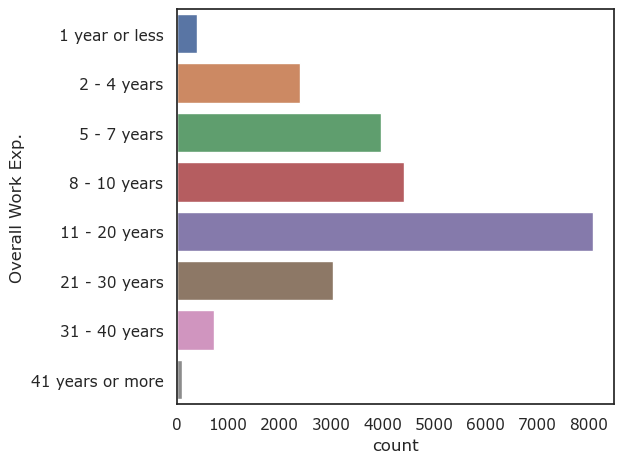

In [33]:
sns.countplot(y= df['Overall Work Exp.'])
plt.tight_layout()

fig, ax = plt.subplots(1, 2)
fig.suptitle('Comparação: Tipos de Experiência e Salários')

ax[0][0] = sns.barplot(y= df['Fieldwork Exp.'], x= df['Annual Salary'])
ax[0][1] = sns.barplot(y= df['Overall Work Exp.'], x= df['Annual Salary'])


plt.tight_layout()

### Análise da Coluna "Age"

In [34]:
df['Age'] = pd.Categorical(df['Age'], categories= ['under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 or over'])

In [35]:
df['Age'].value_counts(dropna=False, normalize = True).mul(100)

25-34         44.409360
35-44         35.741165
45-54         11.587871
18-24          4.091872
55-64          3.758813
65 or over     0.367663
under 18       0.043254
Name: Age, dtype: float64

<AxesSubplot:xlabel='count', ylabel='Age'>

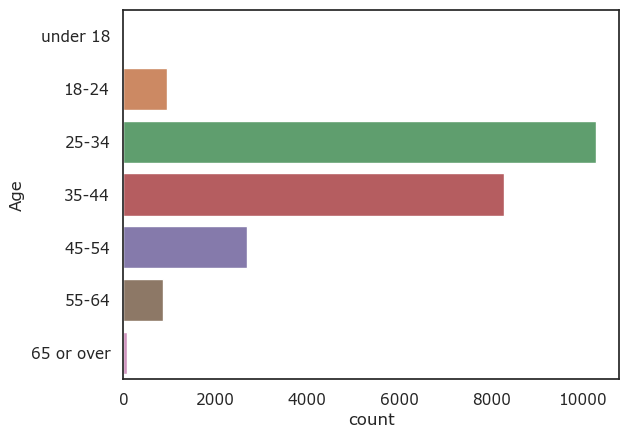

In [36]:
sns.countplot(y= df['Age'])

### Ánalise da Coluna "Country"

In [37]:
df['Country'].value_counts(dropna=False, normalize=True)

United States                                0.384792
USA                                          0.339850
US                                           0.111467
United States                                0.028418
U.S.                                         0.024785
                                               ...   
Cuba                                         0.000043
Cote d'Ivoire                                0.000043
From Romania, but for an US based company    0.000043
Somalia                                      0.000043
U.S.A                                        0.000043
Name: Country, Length: 219, dtype: float64

In [38]:
df['Country'].unique()

array(['United States', 'US', 'USA', 'usa', 'U.S.', 'United States ',
       'us', 'Usa', 'United States of America', 'United states', 'USA ',
       'United states ', 'united states', 'United States of America ',
       'U.S. ', 'U.S>', 'ISA', 'US ', 'United State', 'U.S.A',
       'United Kingdom', 'Denmark', 'U.S.A.', 'America',
       'united states of america', 'Canada', 'Bermuda', 'Us',
       'The United States', 'United State of America', 'Mexico ',
       'France', 'United Stated', 'u.s.', 'UNITED STATES',
       'united States', 'Kuwait', 'Sri lanka', 'Contracts',
       'USA-- Virgin Islands', 'United Statws', 'U.S',
       "We don't get raises, we get quarterly bonuses, but they periodically asses income in the area you work, so I got a raise because a 3rd party assessment showed I was paid too little for the area we were located",
       'Unites States ', 'Usa ', 'U.S.A. ', 'Japan', 'U. S. ', 'Germany',
       'United Sates', 'Japan ', 'United States of American ',
       

In [39]:
pd.set_option('display.max_rows', None)
dfCountry = df.loc[df['Country'].str.contains(r'(Us|US|stat|Stat|us|SA|Un|un|meri)+' , regex=True), :]
dfCountry['Country'].value_counts()

#Alguns países e outras espécies de preenchimento foram "pegos" pela experssão regular.

United States                                                                                                                                                                                                        8896
USA                                                                                                                                                                                                                  7857
US                                                                                                                                                                                                                   2577
United States                                                                                                                                                                                                         657
USA                                                                                                                             

In [40]:
dfCountry.shape

(22255, 13)

In [41]:
#Vamos manter as strings de países diferentes e alterar as strings relacionaadas com USA que estão completamente despadronizadas
#alteração essa para 'USA'. Pessoas que trabalham fora e para os EUA foram consideradas dos Estados Unidos. 

dfCountry2 = dfCountry['Country'].where(dfCountry['Country'].isin(['Russia', 'Australia', 'Australian', 'United Arab Emirates', 
                                                    'United Kingdom']), 'USA')
dfCountry2.value_counts()

#Percebe-se que algumas strings da lista passada não foram consideradas para alteração.

USA               22240
Australia             8
United Kingdom        7
Name: Country, dtype: int64

In [42]:
dfCountry['Country'].shape

(22255,)

In [43]:
df.loc[df['Country'] == 'Russia ', :]

,Age,Work Industry,Job title,Annual Salary,Currency,Country,State (US),City,Overall Work Exp.,Fieldwork Exp.,Level of Education,Gender,Race
7696,25-34,Academia,Assistant,15000.0,USD,Russia,NaN,Moscow,8 - 10 years,5 - 7 years,PhD,Woman,White


In [44]:
df.loc[df['Country'] == 'Australian ', :]

,Age,Work Industry,Job title,Annual Salary,Currency,Country,State (US),City,Overall Work Exp.,Fieldwork Exp.,Level of Education,Gender,Race
23224,35-44,Computing or Tech,Technical Lead,195000.0,USD,Australian,NaN,Sydney,11 - 20 years,11 - 20 years,College degree,Man,White


In [45]:
df.loc[df['Country'] == 'United Arab Emirates ', :]

,Age,Work Industry,Job title,Annual Salary,Currency,Country,State (US),City,Overall Work Exp.,Fieldwork Exp.,Level of Education,Gender,Race
6756,45-54,Education (Higher Education),Librarian,69000.0,USD,United Arab Emirates,NaN,Dubai,21 - 30 years,11 - 20 years,Master's degree,Woman,White


In [46]:
# Como visto nas 3 células acima, percebe-se que o caractere em branco impediu que as strings fossem encontradas. 

dfCountry['Country'] = dfCountry['Country'].where(dfCountry['Country'].isin(['Russia ', 'Australia', 'Australian ', 
                                                                         'United Arab Emirates ', 'United Kingdom']), 'USA')
dfCountry['Country'].value_counts()

USA                      22237
Australia                    8
United Kingdom               7
United Arab Emirates         1
Russia                       1
Australian                   1
Name: Country, dtype: int64

In [47]:
#Vamos corrigi-las (além da correção de 'Australian ' para 'Australia').

dfCountry['Country'].replace({'Russia ':'Russia', 'Australian ':'Australia', 'United Arab Emirates ': 'United Arab Emirates'}, 
                   inplace=True)
dfCountry['Country'].value_counts()

USA                     22237
Australia                   9
United Kingdom              7
United Arab Emirates        1
Russia                      1
Name: Country, dtype: int64

In [48]:
dfCountry['Country'].shape

(22255,)

In [49]:
df['Country'].shape

(23119,)

In [50]:
#Percebe-se que a imensa maioria dos dados para a coluna Country são de residentes do USA. Devido a isso e a grande falta de 
#padrão no preenchimento dos dados, serão considerados para análise, apenas os residentes dos Estados Unidos. 
df = dfCountry.reset_index(drop=True)
df.drop(df[df['Country'] != 'USA'].index, axis=0, inplace=True)
df['Country'].shape

(22237,)

In [51]:
df['Country'].value_counts()

USA    22237
Name: Country, dtype: int64

### Análise da Coluna "State (US)"

In [52]:
#Percebe-se que há pessoas que trabalham em mais de uma cidade. Incluirei essas em um mesmo conjunto 
#chamado "More than one State". Washington DC foi considerado tanto como estado como cidade.
df['State (US)'].value_counts(dropna=False, ascending=True)

Alabama, Montana                                                                                                         1
Arkansas, Iowa, Massachusetts, Ohio, Wyoming                                                                             1
Massachusetts, Vermont                                                                                                   1
District of Columbia, Maryland, Virginia                                                                                 1
Colorado, Massachusetts                                                                                                  1
Montana, Wyoming                                                                                                         1
New Jersey, Virginia                                                                                                     1
Nevada, Oregon                                                                                                           1
Massachusetts, P

In [53]:
df.loc[df['State (US)'].str.contains(r'(,)+', regex=True, na=False), ['State (US)']] = 'More than one State'

In [54]:
df['State (US)'].value_counts(dropna=False)

California              2488
New York                2087
Massachusetts           1452
Texas                   1200
Illinois                1166
Washington              1152
District of Columbia     947
Pennsylvania             912
Virginia                 756
Minnesota                690
Ohio                     615
Colorado                 607
Oregon                   606
North Carolina           574
Maryland                 535
Michigan                 525
Georgia                  508
Florida                  505
Wisconsin                443
New Jersey               384
Missouri                 321
Indiana                  315
Arizona                  295
Tennessee                273
Connecticut              232
Utah                     195
Kentucky                 188
Iowa                     170
NaN                      168
Kansas                   146
South Carolina           141
Louisiana                125
Maine                    121
New Hampshire            116
Alabama       

In [55]:
#Os EUA possui 50 estados. As cateogiras dessa variável totalizaram 53 pois:
#1. District of Columbia (Washington DC) foi considerado como estado (apesar de não ser nem cidade, mas sim um distrito)
#2. Foi inserido o dado "More than one State"
#3. Tem o label NaN dos dados de valores missing. 
len(df['State (US)'].value_counts(dropna=False)) 

53

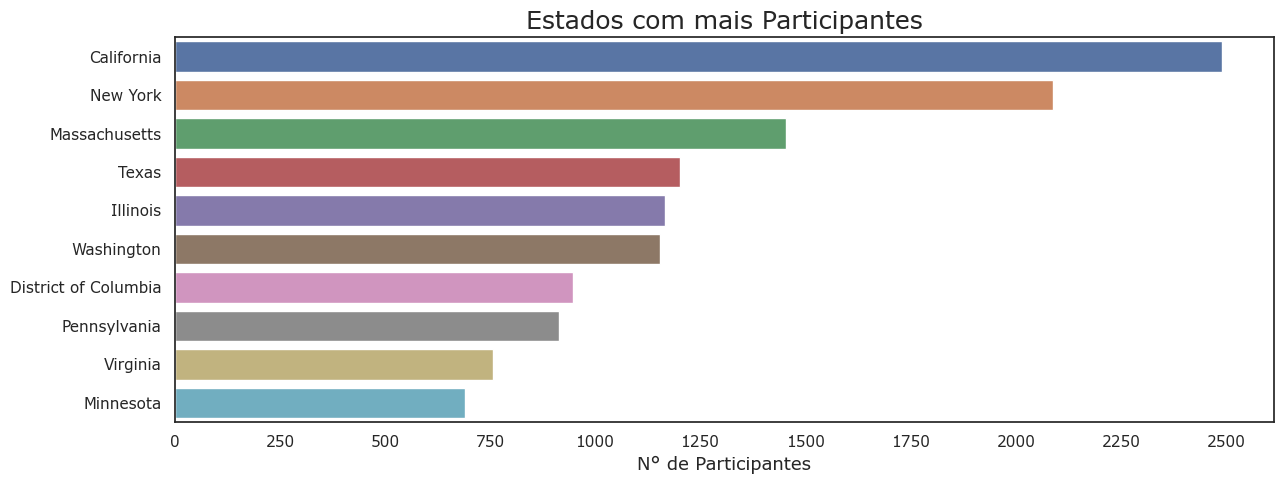

In [58]:
fig, ax = plt.subplots(figsize=(13,5))
sns.set_theme(style='darkgrid', font= 'verdana' )
states = df['State (US)'].value_counts()[0:10]
ax = sns.barplot(x=states, y= states.index)
ax.set_title('Estados com mais Participantes', fontsize= 18)
ax.set_xlabel('N° de Participantes', fontsize= 13)
ax.set_xticks(np.arange(0,2750,250))

plt.tight_layout()

### Análise da Coluna "City"

> Há muita cardinalidade nos dados e falta de padrão no preenchimento. Apenas selecionarei as 10 cidades onde as pessoas mais trabalham. Nessas cidades, será feito tratamento dos dados. Sempre que possível, será considerado a cidade onde o trabalhador reside caso esse trabalhe remoto.  Para os preenchimentos onde não se especifica a cidade em si, mas sim uma medida de proximidade de uma determinada cidade, será considerada a cidade usada como referência. Caso contenha duas cidades diferentes de estados diferentes sem especificar o local de moradia, será atribuido como "More than one City" (mais do que uma cidade). Caso se especifique o estado, será utilizado a capital do respectivo estado.

In [59]:
df['City'].isnull().sum()

55

In [60]:
#Cardinalidade muito grande (além da ausência de padrão de preenchimento).
len(df['City'].value_counts(dropna=False))

3694

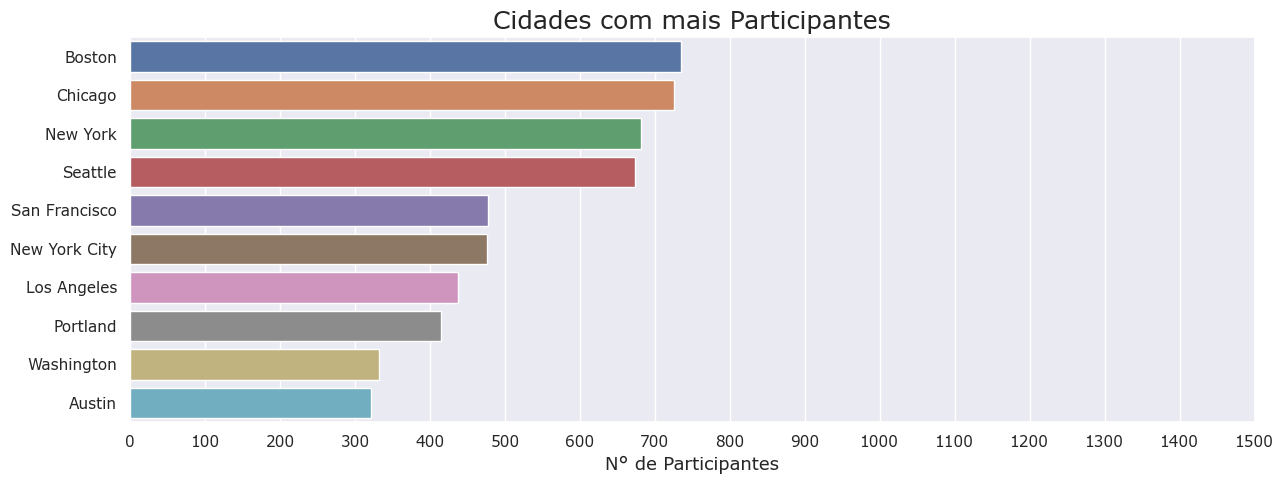

In [61]:
fig, ax = plt.subplots(figsize=(13,5))
sns.set_theme(style = 'darkgrid', font='verdana')
cities = df['City'].value_counts(dropna=False)[0:10]
ax = sns.barplot(y=cities.index, x=cities)
ax.set_title('Cidades com mais Participantes', fontsize= 18)
ax.set_xlabel('N° de Participantes', fontsize= 13)
ax.set_xticks(np.arange(0,1600,100))

plt.tight_layout()

#### Boston   

In [62]:
df.loc[df['City'].str.contains('Boston', na=False), ['City']].value_counts()

City                                                                             
Boston                                                                               735
Boston                                                                                49
Boston, MA                                                                            13
Boston area                                                                            8
Boston Area                                                                            5
Boston suburbs                                                                         2
Metro Boston                                                                           2
North of Boston                                                                        2
Greater Boston Area                                                                    2
Greater Boston area                                                                    2
Remote. Live near Boston    

In [63]:
df['City'].loc[df['City'] == 'I left Boston for Indiana, so get a Boston salary in south bend '] = 'Indianápolis'
df['City'].loc[df['City'] == 'NYC, remotely for a Boston company'] = 'New York City'
df['City'].loc[df['City'] == 'Remote. Company is in Boston, I am in SF'] = 'San Francisco'
df['City'].loc[df['City'] == 'San Francisco, but company is Boston based'] = 'San Francisco'
df['City'].loc[df['City'] == 'Salem (remote for Boston Mass)'] = 'Salem'
df['City'].loc[df['City'] == 'NYC, remotely for a Boston company'] = 'New York City'
df['City'].loc[df['City'] == 'Raleigh; role based out of Boston MA'] = 'Raleigh'
df['City'].loc[df['City'] == 'Denver/Boston'] = 'More than one City'

In [64]:
df.loc[df['City'].str.contains('Boston', na=False), ['City']].value_counts()

City                                                                             
Boston                                                                               735
Boston                                                                                49
Boston, MA                                                                            13
Boston area                                                                            8
Boston Area                                                                            5
Boston suburbs                                                                         2
Greater Boston Area                                                                    2
Greater Boston area                                                                    2
Metro Boston                                                                           2
North of Boston                                                                        2
HQ us in Cambridge, Ma but m

In [65]:
df.loc[df['City'].str.contains('Boston', na=False), ['City']] = 'Boston' 

In [66]:
df.loc[df['City'].str.contains('Boston', na=False), ['City']].value_counts()

City  
Boston    855
dtype: int64

#### Chicago

In [67]:
df.loc[df['City'].str.contains('Chicago', na=False), ['City']].value_counts()

City                                                                                
Chicago                                                                                 726
Chicago                                                                                  70
Chicago suburbs                                                                          12
Chicago Suburbs                                                                           8
North Chicago                                                                             4
Chicagoland                                                                               4
Chicago area                                                                              4
Chicago, IL                                                                               4
Suburban Chicago                                                                          3
 Chicago                                                                               

In [68]:
df['City'].loc[df['City'] == 'Work remotely, but the company is based out of Chicago, IL and I work in Newark, NJ'] = 'Newark'
df['City'].loc[df['City'] == 'Office was in Chicago, now WFH in WI'] = 'Madison'
df['City'].loc[df['City'] == 'Chicago/Evanston'] = 'More than one City'
df['City'].loc[df['City'] == 'Chicago/Deerfield (two offices)'] = 'More than one City'
df['City'].loc[df['City'] == 'Denver, Chicago'] = 'More than one City'

In [69]:
df.loc[df['City'].str.contains('Chicago', na=False), ['City']].value_counts()

City                                                                                
Chicago                                                                                 726
Chicago                                                                                  70
Chicago suburbs                                                                          12
Chicago Suburbs                                                                           8
Chicago area                                                                              4
Chicagoland                                                                               4
Chicago, IL                                                                               4
North Chicago                                                                             4
Suburban Chicago                                                                          3
Greater Chicago Area                                                                   

In [70]:
df.loc[df['City'].str.contains('Chicago', na=False), ['City']] = 'Chicago'

In [71]:
df.loc[df['City'].str.contains('Chicago', na=False), ['City']].value_counts()

City   
Chicago    872
dtype: int64

#### New York City

In [72]:
df.loc[df['City'].str.contains('New York', na=False), ['City']].value_counts()

City                           
New York                           682
New York City                      477
New York                            76
New York City                       20
New York, NY                         6
New York city                        6
Austin / New York                    1
New York City/Brooklyn               1
New YorknCity                        1
New York, New York                   1
New York, NY                         1
New York city                        1
New York Metro                       1
New York City, New York              1
New York City, currently remote      1
Greater New York Metro Area          1
New York City Suburbs                1
New York City (remote)               1
New York City (The Bronx)            1
New York CIty                        1
New York Buty                        1
Upstate New York                     1
dtype: int64

In [73]:
df.loc[df['City'].str.contains('New York', na=False), ['City']] = 'New York City'

In [74]:
df.loc[df['City'].str.contains(r'(NY)|(NYC)|(Upstate NY)|(NYC, NY)'
                               , regex=True, na=False), ['City']].value_counts()

City                                                                               
NYC                                                                                    211
NYC                                                                                      8
NY                                                                                       6
Upstate NY                                                                               4
Albany, NY                                                                               3
Rochester, NY                                                                            3
Hudson, NY                                                                               2
Upstate, NY                                                                              1
Primary WFH or NYC; however travel to client site weekly in the "before times"           1
NYC metro area                                                                           1
Work r

In [75]:
df['City'].loc[df['City'] == 'NA (remote). Live near Boston, work is based in upstate NY'] = 'Boston'
df['City'].loc[df['City'] == 'NY metro area but not NYC'] = 'New York Metro Area'
df['City'].loc[df['City'] == 'WFH in Northern NJ but company HQ is in Illinois, local office NYC'] = 'Northern New Jersey'
df['City'].loc[df['City'] == 'Denver (but remote - company is NYC)'] = 'Denver'

In [76]:
#Tratei as cidades acima para que a linha de código abaixo não as considere como NYC. 
df['City'].loc[df['City'] == 'NYC'] = 'New York City'

#### San Francisco

In [77]:
df.loc[df['City'].str.contains('San Francisco', na=False), ['City']].value_counts()

City                                                        
San Francisco                                                   480
San Francisco                                                    78
San Francisco Bay Area                                           17
South San Francisco                                              10
San Francisco Bay area                                            2
San Francisco (nominally; I work from home now due to COVID)      1
San Francisco, CA                                                 1
WFH in San Francisco Bay Area                                     1
dtype: int64

In [78]:
df.loc[df['City'].str.contains('San Francisco', na=False), ['City']] = 'San Francisco'

#### Seattle

In [79]:
df.loc[df['City'].str.contains('Seattle', na=False), ['City']].value_counts()

City                                                                               
Seattle                                                                                674
Seattle                                                                                 42
Seattle, WA                                                                              5
Seattle Area                                                                             2
Seattle area                                                                             2
Greater Seattle area                                                                     1
Yakima but my employer is based in Seattle                                               1
Seattle, wa                                                                              1
Seattle, Washington                                                                      1
Seattle, Wa                                                                              1
Seattl

In [80]:
df['City'].loc[df['City'] == 'Yakima but my employer is based in Seattle'] = 'Yakima'
df['City'].loc[df['City'] == 'Merrick - my home, but we do have an office in NYC.  Main office is in Seattle, WA.'] = 'Hempstead'
df.loc[df['City'].str.contains('Seattle', na=False), ['City']] = 'Seattle'

#### Los Angeles

In [81]:
df.loc[df['City'].str.contains('Los Angeles', na=False), ['City']].value_counts()

City                                                                     
Los Angeles                                                                  437
Los Angeles                                                                   59
Los Angeles County                                                             2
Los Angeles, CA                                                                2
 Los Angeles                                                                   1
Los Angeles (but my job is remote)                                             1
Los Angeles Metro                                                              1
Los Angeles Metro Area                                                         1
Los Angeles area                                                               1
Los Angeles metro area                                                         1
Los Angeles, but I work with people in Europe including the company owner      1
Los Angeles, or I travel for work  

In [82]:
df.loc[df['City'].str.contains('Los Angeles', na=False), ['City']] = 'Los Angeles'

In [83]:
df.loc[df['City'].str.contains('LA', na=False), ['City']].value_counts()

City                                
LA                                      5
ATLANTA                                 2
Near LA                                 2
Alexandria, LA                          1
EAST LANSING                            1
Geismar, LA                             1
PORTLAND                                1
Remote (HQ in San Fran, based in LA)    1
dtype: int64

In [84]:
df['City'].replace('LA', 'Los Angeles', inplace=True)
df['City'].loc[df['City'] == 'Alexandria, LA'] =  'Los Angeles'
df['City'].loc[df['City'] == 'Geismar, LA'] =  'Los Angeles'
df['City'].loc[df['City'] == 'Remote (HQ in San Fran, based in LA)'] =  'Los Angeles'

In [85]:
df.loc[df['City'].str.contains('LA', na=False), ['City']].value_counts()

City        
ATLANTA         2
Near LA         2
EAST LANSING    1
PORTLAND        1
dtype: int64

#### Portland

In [86]:
df.loc[df['City'].str.contains('Portland', na=False), ['City']].value_counts()

City                                               
Portland                                               415
Portland                                                50
Portland, OR                                             9
Portland, ME                                             4
Portland, Oregon                                         2
Beaverton, OR (Portland suburb)                          1
South Portland                                           1
Portland, or                                             1
Portland, Oregon                                         1
Portland, OR (remote for a company in CA)                1
Portland, Maine                                          1
Portland, ME area                                        1
Portland metro                                           1
Portland metro area                                      1
Gorham/Portland                                          1
Portland area                                            1
Port

In [87]:
df.loc[df['City'].str.contains('Portland', na=False), ['City']] = 'Portland'

#### Washington

In [88]:
df.loc[df['City'].str.contains('Washington', na=False), ['City']].value_counts()

City                                             
Washington                                           332
Washington, DC                                       247
Washington DC                                        143
Washington                                            38
Washington, D.C.                                      22
Washington DC                                         13
Washington D.C.                                       11
Washington, DC                                         7
Washington, D.C.                                       6
Washington D.C.                                        3
Eastern Washington                                     2
Washington, DC.                                        1
Washington, DC area                                    1
Washington, DC Primarily                               1
Washington, DC - Baltimore, MD area.                   1
Washington, DC (I'm remote, but office is in DC)       1
Washington, D.C                       

In [89]:
df['City'].loc[df['City'] == 'Mount Washington'] = 'Mount Washington'
df['City'].loc[df['City'] == 'Mount Washington '] = 'Mount Washington'
df['City'].loc[df['City'] == 'Mt. Washington'] = 'Mount Washington'
df['City'].loc[df['City'] == 'Fort Washington '] = 'Fort Washington'
df['City'].loc[df['City'] == 'Mount Washington'] = 'Concord'
df['City'].loc[df['City'] == 'Fort Washington'] = 'Annapolis'
df['City'].loc[df['City'] == 'Port Washington'] = 'North Hempstead'
df['City'].loc[df['City'].str.contains('Tiverton', na=False)] = 'Tiverton'

In [90]:
df.loc[df['City'].str.contains(r'(D.C)|(DC)|(dc)|(D.C.)|(d.c.)', regex=True, na=False), ['City']].value_counts()

City                                                                               
Washington, DC                                                                         247
Washington DC                                                                          143
DC                                                                                     106
Washington, D.C.                                                                        22
Washington DC                                                                           13
Washington D.C.                                                                         11
D.C.                                                                                     8
Washington, DC                                                                           7
Washington, D.C.                                                                         6
washington dc                                                                            4
Washin

In [91]:
df['City'].loc[df['City'] == 'Washington DC (and Philadelphia PA)'] = 'More than one City'
df['City'].loc[df['City'] == 'Remotely in NC for DC employer'] = 'Raleigh'
df['City'].loc[df['City'] == 'RAPID CITY'] = 'rpsdk'
df.loc[df['City'].str.contains(r'(D.C)|(DC)|(dc)|(D.C.)|(d.c.)', regex=True, na=False), ['City']] = 'Washington, DC'
df['City'].loc[df['City'] == 'Washington, District of Columbia '] = 'Washington, DC'
df['City'].loc[df['City'] == 'rpsdk'] = 'Rapid City'
df['City'].loc[df['City'] == 'Seattle, Washington'] = 'More than one City'

In [92]:
df.loc[df['City'].str.contains('Washington', na=False), ['City']].value_counts()

City                  
Washington, DC            617
Washington                332
Washington                 38
Eastern Washington          2
Rural Washington State      1
Washington state            1
dtype: int64

In [93]:
df.loc[df['City'].str.contains('Washington', na=False), ['City']] = 'Washington, DC'

In [94]:
df.loc[df['City'].str.contains('Washington', na=False), ['City']].value_counts()

City          
Washington, DC    991
dtype: int64

#### Austin

In [95]:
df.loc[df['City'].str.contains('Austin', na=False), ['City']].value_counts()

City             
Austin               321
Austin                12
Austin, TX             2
Austin Metro Area      1
Austin metro area      1
Austin, TX             1
Austin, Texas          1
Port Austin            1
dtype: int64

In [96]:
df['City'].loc[df['City'] == 'Port Austin'] = 'Lansing'
df['City'].loc[df['City'] == 'Austin / New York'] = 'More than one City'
df.loc[df['City'].str.contains('Austin', na=False), ['City']] = 'Austin'

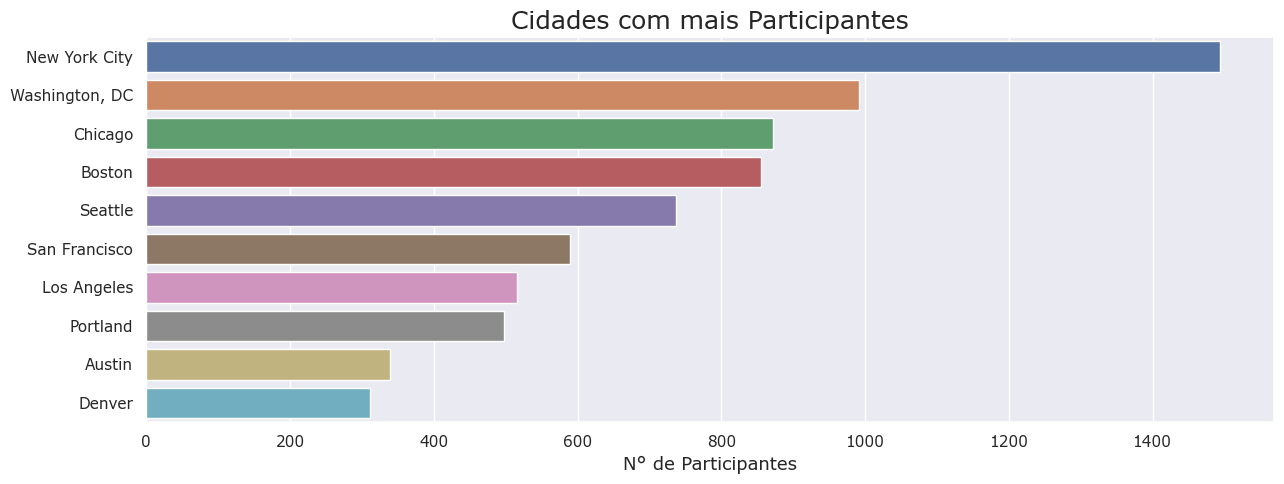

In [97]:
fig, ax = plt.subplots(figsize=(13,5))
sns.set_theme(style = 'darkgrid', font='verdana')
cities = df['City'].value_counts(dropna=False)[0:10]
ax = sns.barplot(y=cities.index, x=cities)
ax.set_title('Cidades com mais Participantes', fontsize= 18)
ax.set_xlabel('N° de Participantes', fontsize= 13)
plt.tight_layout()

#### Denver

In [98]:
df['City'].loc[df['City'].str.contains('Denver', na=False)].value_counts()

Denver                            311
Denver                             14
Denver, CO                          3
Denver metro                        3
Denver Metro Area                   2
Fully remote job (Denver area)      1
Not Denver                          1
Denver Metro                        1
Denver CO                           1
Lakewood (live in Denver)           1
Denver - remote                     1
Denver-metro                        1
Name: City, dtype: int64

In [99]:
df['City'].loc[df['City'] == 'Not Denver'] = 'Unknown City'
df['City'].loc[df['City'].str.contains('Denver', na=False)] = 'Denver'

### Análise da Coluna Work Industry

In [100]:
df['Work Industry'].describe()

count                 22184
unique                  994
top       Computing or Tech
freq                   3557
Name: Work Industry, dtype: object

In [101]:
df['Work Industry'].value_counts()[0:20]

Computing or Tech                       3557
Nonprofits                              2047
Education (Higher Education)            2006
Health care                             1569
Accounting, Banking & Finance           1412
Engineering or Manufacturing            1374
Government and Public Administration    1354
Law                                      921
Marketing, Advertising & PR              877
Education (Primary/Secondary)            687
Business or Consulting                   678
Media & Digital                          596
Insurance                                446
Recruitment or HR                        389
Retail                                   383
Property or Construction                 297
Art & Design                             290
Utilities & Telecommunications           255
Sales                                    237
Transport or Logistics                   235
Name: Work Industry, dtype: int64

In [102]:
df['Work Industry'].loc[df['Work Industry'].str.contains('Education', na=False)].value_counts()

Education (Higher Education)                                                                               2006
Education (Primary/Secondary)                                                                               687
Educational technology                                                                                        2
Early Childhood Education                                                                                     2
Data/Institutional Research in Higher Education                                                               1
Hybrid Nonprofit Higher Education (we are part of a university but our entire budget comes from grants)       1
Education- museum/public outreach                                                                             1
Beauty Manufacturing & Education                                                                              1
Educational products                                                                                    

In [103]:
df['Work Industry'].loc[df['Work Industry'].str.contains('Education', na=False)] = 'Education'
df['Work Industry'].loc[df['Work Industry'].str.contains('Education', na=False)].value_counts()

Education    2719
Name: Work Industry, dtype: int64

In [104]:
df['Work Industry'].value_counts()[0:20]

Computing or Tech                       3557
Education                               2719
Nonprofits                              2047
Health care                             1569
Accounting, Banking & Finance           1412
Engineering or Manufacturing            1374
Government and Public Administration    1354
Law                                      921
Marketing, Advertising & PR              877
Business or Consulting                   678
Media & Digital                          596
Insurance                                446
Recruitment or HR                        389
Retail                                   383
Property or Construction                 297
Art & Design                             290
Utilities & Telecommunications           255
Sales                                    237
Transport or Logistics                   235
Social Work                              228
Name: Work Industry, dtype: int64

In [105]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Insurance)|(insurance)', regex=True, na=False)].value_counts()

Insurance                           446
Health Insurance                      1
Automotive finance and insurance      1
Name: Work Industry, dtype: int64

In [106]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Insurance)|(insurance)', regex=True, na=False)] = 'Insurance'
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Insurance)|(insurance)', regex=True, na=False)].value_counts()

Insurance    448
Name: Work Industry, dtype: int64

In [107]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(health)|(Health)|(medical)|(Medical)', 
                                                         regex=True, na=False)].value_counts()

Health care                                         1569
Biomedical Research                                    8
Medical Research                                       4
Public Health                                          4
Medical Devices                                        3
Healthcare IT                                          3
Biomedical research                                    2
Public health                                          2
Medical Device                                         2
Medical Technology                                     2
public health                                          2
Global Health Consulting                               1
Medical supply Wholesale & Warehousing                 1
Animal Health                                          1
Animal health industry                                 1
Non-profit health care (I couldn’t select both)        1
Public Health- state level                             1
Healthcare Information Technolo

In [108]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(health)|(Health)|(medical)|(Medical)', 
                                                         regex=True, na=False)] = 'Medical/Health Care'
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(health)|(Health)|(medical)|(Medical)', 
                                                         regex=True, na=False)].value_counts()

Medical/Health Care    1642
Name: Work Industry, dtype: int64

In [109]:
df['Work Industry'].value_counts()[0:20]

Computing or Tech                       3557
Education                               2719
Nonprofits                              2047
Medical/Health Care                     1642
Accounting, Banking & Finance           1412
Engineering or Manufacturing            1374
Government and Public Administration    1354
Law                                      921
Marketing, Advertising & PR              877
Business or Consulting                   678
Media & Digital                          596
Insurance                                448
Recruitment or HR                        389
Retail                                   383
Property or Construction                 297
Art & Design                             290
Utilities & Telecommunications           255
Sales                                    237
Transport or Logistics                   235
Social Work                              228
Name: Work Industry, dtype: int64

In [110]:
df['Work Industry'].loc[df['Work Industry'].str.
                        contains(r'(Engineering)|(Manufacturing)|(Construction)|(Architecture|archi)', 
                                 regex=True, na=False)].value_counts()

Engineering or Manufacturing                           1374
Property or Construction                                297
Manufacturing                                            22
Architecture                                             17
Manufacturing                                            11
Construction                                              7
Architecture                                              6
Construction                                              3
Food Manufacturing                                        2
Library/archives                                          2
Pharmaceutical Manufacturing                              2
Production and Manufacturing                              1
Aerospace and Defense Manufacturing                       1
Manufacturing/Consumer Packaged Goods                     1
R&D in Manufacturing                                      1
Landscape Architecture                                    1
Architecture, Engineering, Construction 

In [111]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Engineering)|(Manufacturing)|(Construction)|(Architecture|archi)', 
                                                         regex=True, na=False)] = 'Engineering/Manufacturing/Construction'

In [112]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Libra|libra)', regex=True, na=False)].value_counts()

Libraries                                                                                                 44
Library                                                                                                   44
Public Library                                                                                            31
Public Libraries                                                                                          16
Public library                                                                                             9
public library                                                                                             5
Public library                                                                                             4
Library                                                                                                    4
library                                                                                                    4
Librarian          

In [113]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Libra|libra)', 
                                                         regex=True, na=False)] = 'Business/Consulting/Administrative Work'

In [114]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Business|business)', regex=True, na=False)].value_counts()

Business or Consulting                      678
Business/Consulting/Administrative Work     214
Business Services                             1
Federal Contracting/Business Development      1
Small business/service company                1
Business Process Outsourcing                  1
I have two jobs. Marketing / Business         1
Name: Work Industry, dtype: int64

In [115]:
df['Work Industry'].loc[df['Work Industry'] == 'Business or Consulting'] = 'Business/Consulting/Administrative Work'

In [116]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Marketing|marketing)', regex=True, na=False)].value_counts()

Marketing, Advertising & PR                                                              877
Marketing at a Non Profit                                                                  1
University tech transfer (higher ed/marketing/writing)                                     1
Marketing technology                                                                       1
digital marketing within a book publishing company (please reclassify as you see fit)      1
I have two jobs. Marketing / Business                                                      1
Digital Marketing                                                                          1
Name: Work Industry, dtype: int64

In [117]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Marketing|marketing)', 
                                                         regex=True, na=False)] = 'Business/Consulting/Administrative Work'

In [118]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Recruitment|HR|Human Resources)', 
                                                         regex=True, na=False)].value_counts()

Recruitment or HR    389
Human Resources        2
HRO                    1
Human Resources        1
Name: Work Industry, dtype: int64

In [119]:
df['Work Industry'].loc[df['Work Industry'].str.
                        contains(r'(Recruitment|HR|Human Resources)', 
                                 regex=True, na=False)] = 'Business/Consulting/Administrative Work'

In [120]:
df['Work Industry'].value_counts()[0:20]

Computing or Tech                          3557
Education                                  2719
Business/Consulting/Administrative Work    2168
Nonprofits                                 2047
Engineering/Manufacturing/Construction     1772
Medical/Health Care                        1642
Accounting, Banking & Finance              1412
Government and Public Administration       1354
Law                                         921
Media & Digital                             596
Insurance                                   448
Retail                                      383
Art & Design                                290
Utilities & Telecommunications              255
Sales                                       237
Transport or Logistics                      235
Social Work                                 228
Hospitality & Events                        201
Entertainment                               195
Agriculture or Forestry                     105
Name: Work Industry, dtype: int64

In [121]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'((Art|art)|(Design|design)|(Media|media))', 
                                                         regex=True, na=False)].value_counts()

Media & Digital                            596
Art & Design                               290
apparel design/product development           1
consumer product design                      1
Instructional Design and Training            1
Instructional Design, Aviation Industry      1
Instructional Designer                       1
Nonprofit - legal department                 1
Interior Design (commercial)                 1
Funding Intermediary                         1
art appraisal                                1
Performing Arts                              1
Consumer Products design                     1
Arts Administration                          1
Earth sciences                               1
Name: Work Industry, dtype: int64

In [122]:
df['Work Industry'].loc[df['Work Industry'].str.
                        contains(r'((Art|art)|(Design|design)|(Media|media))', regex=True, na=False)] = 'Art/Design/Media'

In [123]:
df['Work Industry'].loc[df['Work Industry'].str.
                        contains(r'(Hospitality|(events|Events)|(Entertainment|entertainment))', 
                                 regex=True, na=False)].value_counts()

Hospitality & Events                   201
Entertainment                          195
Fitness & Entertainment                  1
Entertainment data                       1
Graduate assistant and also events       1
Name: Work Industry, dtype: int64

In [124]:
df['Work Industry'].loc[df['Work Industry'].str.
                        contains(r'(Hospitality|(events|Events)|(Entertainment|entertainment))', 
                                 regex=True, na=False)] = 'Hospitality/Events/Entertainment'

In [125]:
df['Work Industry'].value_counts()[0:20]

Computing or Tech                          3557
Education                                  2719
Business/Consulting/Administrative Work    2168
Nonprofits                                 2047
Engineering/Manufacturing/Construction     1772
Medical/Health Care                        1642
Accounting, Banking & Finance              1412
Government and Public Administration       1354
Law                                         921
Art/Design/Media                            899
Insurance                                   448
Hospitality/Events/Entertainment            399
Retail                                      383
Utilities & Telecommunications              255
Sales                                       237
Transport or Logistics                      235
Social Work                                 228
Agriculture or Forestry                     105
Leisure, Sport & Tourism                     72
Publishing                                   45
Name: Work Industry, dtype: int64

In [126]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'((Account|account)|(finance|Finance)|banking)', 
                                                         regex=True, na=False)].value_counts()

Accounting, Banking & Finance                                            1412
Finance                                                                     3
Finance/Investment Management but in legal/compliance, so back-office       1
Corporate accounting in death care (funeral & cemetery)                     1
I work in the finance function of a large global conglomerate               1
finance                                                                     1
Professional Association in Finance                                         1
Name: Work Industry, dtype: int64

In [127]:
df['Work Industry'].loc[df['Work Industry'].str.
                        contains(r'((Account|account)|(finance|Finance)|banking)', 
                                 regex=True, na=False)] = 'Accounting/Banking/Finance'

In [128]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Govern|govern)|(politics|Politics)', 
                                                         regex=True, na=False)].value_counts()

Government and Public Administration                               1354
Politics                                                              8
Government Relations                                                  3
Government contracting                                                2
Government contractor                                                 2
Government Contracting                                                2
Government Affairs/Lobbying                                           2
Government Contracting R&D                                            1
Government                                                            1
Aerospace and Defense/Government Contracting                          1
Government Contractor (R&D)                                           1
government contractor, international development                      1
Science/government                                                    1
Science Research, government                                    

In [129]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Govern|govern)|(politics|Politics)', 
                                                         regex=True, na=False)] = 'Government/Public Administration'

In [130]:
df['Work Industry'].value_counts()[0:20]

Computing or Tech                          3557
Education                                  2719
Business/Consulting/Administrative Work    2168
Nonprofits                                 2047
Engineering/Manufacturing/Construction     1772
Medical/Health Care                        1642
Accounting/Banking/Finance                 1420
Government/Public Administration           1391
Law                                         921
Art/Design/Media                            899
Insurance                                   448
Hospitality/Events/Entertainment            399
Retail                                      383
Utilities & Telecommunications              255
Sales                                       237
Transport or Logistics                      235
Social Work                                 228
Agriculture or Forestry                     105
Leisure, Sport & Tourism                     72
Biotech                                      45
Name: Work Industry, dtype: int64

In [131]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Bio|bio|(pharma|Pharma))', regex=True, na=False)].value_counts()

Biotech                                                                                                                                                                        45
Pharmaceuticals                                                                                                                                                                19
Pharma                                                                                                                                                                         16
Biotechnology                                                                                                                                                                  15
Pharmaceutical                                                                                                                                                                 14
Pharmaceutical                                                                                                

In [132]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Bio|bio|(pharma|Pharma))', 
                                                         regex=True, na=False)] = 'Biotechnology/Pharma/Biology'

In [133]:
df['Work Industry'].value_counts()[0:20]

Computing or Tech                          3557
Education                                  2719
Business/Consulting/Administrative Work    2168
Nonprofits                                 2047
Engineering/Manufacturing/Construction     1772
Medical/Health Care                        1642
Accounting/Banking/Finance                 1420
Government/Public Administration           1391
Law                                         921
Art/Design/Media                            899
Insurance                                   448
Hospitality/Events/Entertainment            399
Retail                                      383
Utilities & Telecommunications              255
Sales                                       237
Transport or Logistics                      235
Social Work                                 228
Biotechnology/Pharma/Biology                212
Agriculture or Forestry                     105
Leisure, Sport & Tourism                     72
Name: Work Industry, dtype: int64

In [134]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(sport|Sport|(tourism|Tourism))', 
                                                         regex=True, na=False)].value_counts()

Transport or Logistics                           235
Leisure, Sport & Tourism                          72
Industrial Cleaning & Non Hazardous Transport      1
Tourism                                            1
State-level public transportation agency           1
Sports                                             1
Name: Work Industry, dtype: int64

In [135]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Transport|transport)|(logistics|Logistics|Supply|supply)', 
                                                         regex=True, na=False)].value_counts()

Transport or Logistics                           235
Supply chain                                       2
Supply Chain                                       2
Logistics                                          1
Supply Chain Distribution                          1
Industrial Cleaning & Non Hazardous Transport      1
State-level public transportation agency           1
Industrial Supply                                  1
Supply Chain!                                      1
Supply Chain Operations                            1
Name: Work Industry, dtype: int64

In [136]:
df['Work Industry'].loc[df['Work Industry'].str.
                        contains(r'(Transport|transport)|(logistics|Logistics|Supply|supply)', 
                                 regex=True, na=False)] = 'Transport/Logistics'

In [137]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(sport|Sport|(tourism|Tourism))', 
                                                         regex=True, na=False)].value_counts()

Transport/Logistics         246
Leisure, Sport & Tourism     72
Tourism                       1
Sports                        1
Name: Work Industry, dtype: int64

In [138]:
df['Work Industry'].replace({'Tourism':'Leisure, Sport & Tourism', 'Sports':'Leisure, Sport & Tourism'}, inplace=True)

In [139]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(sport|Sport|(tourism|Tourism))', 
                                                         regex=True, na=False)].value_counts()

Transport/Logistics         246
Leisure, Sport & Tourism     74
Name: Work Industry, dtype: int64

In [140]:
df['Work Industry'].replace('Leisure, Sport & Tourism', 'Leisure/Sport/Tourism', inplace=True)

In [141]:
df['Work Industry'].value_counts()[0:20]

Computing or Tech                          3557
Education                                  2719
Business/Consulting/Administrative Work    2168
Nonprofits                                 2047
Engineering/Manufacturing/Construction     1772
Medical/Health Care                        1642
Accounting/Banking/Finance                 1420
Government/Public Administration           1391
Law                                         921
Art/Design/Media                            899
Insurance                                   448
Hospitality/Events/Entertainment            399
Retail                                      383
Utilities & Telecommunications              255
Transport/Logistics                         246
Sales                                       237
Social Work                                 228
Biotechnology/Pharma/Biology                212
Agriculture or Forestry                     105
Leisure/Sport/Tourism                        74
Name: Work Industry, dtype: int64

In [142]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(agri|Agri)|(fore|Fore)', regex=True, na=False)].value_counts()

Agriculture or Forestry              105
Agriculture/Agriculture Chemical       1
Forensics                              1
Name: Work Industry, dtype: int64

In [143]:
df['Work Industry'].replace(
    {'Agriculture or Forestry':'Agriculture/Forestry', 
             'Agriculture/Agriculture Chemical':'Agriculture/Forestry', 'Forensics':'Law'}, inplace=True)

In [144]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(social|Social)', regex=True, na=False)].value_counts()

Social Work                                                                                228
Academic research (social science)                                                           1
social science research - not quite academia, not quite nonprofit, not quite consulting      1
Research/Social Science                                                                      1
Social science                                                                               1
Social sciences research                                                                     1
Name: Work Industry, dtype: int64

In [145]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(social|Social)', regex=True, na=False)] = 'Social Work'

In [146]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(computing|Computing)|(tech|Tech)|(IT|Information)', 
                                                         regex=True, na=False)].value_counts()

Computing or Tech                            3557
Biotechnology/Pharma/Biology                  212
IT                                              4
Tech                                            3
Technology                                      3
Fintech                                         3
Publishing: Science, Academic, Technical        1
Ecommerce - Technology                          1
Automotive technician                           1
Technology                                      1
Ed Tech                                         1
Technical writing                               1
Educ tech                                       1
Information Technology                          1
Information technology (IT)                     1
Bitech                                          1
Information                                     1
FinTech/Payment Processing                      1
publishing/edtech                               1
IT MSP                                          1


In [147]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Comme|comme)', regex=True, na=False)].value_counts()

Commercial Real Estate                                4
E-commerce                                            3
Commercial Real Estate                                2
E commerce                                            1
e-commerce                                            1
Ecommerce                                             1
E-Commerce                                            1
Ecommerce fraud                                       1
Delivery and installation for commercial machinery    1
Commercial Real Estate Data and Analytics/Research    1
Fashion/e-commerce                                    1
Commercial Fisherman                                  1
Commercial furniture                                  1
Ecommerce - Technology                                1
Commercial Landscaping                                1
ECommerce                                             1
Commercial Building Material Distribution             1
Commercial Real Estate - Private Equity         

In [148]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Comme|comme)', regex=True, na=False)] = 'Sales'

In [149]:
df['Work Industry'].loc[(df['Work Industry'].str.contains(
    r'(computing|Computing)|(tech|Tech)|(IT|Information)', regex=True, na=False)) & 
                        (df['Work Industry'] != 'Biotechnology/Pharma/Biology') & 
                        (df['Work Industry'] != 'Automotive technician')].value_counts()

Computing or Tech                            3557
IT                                              4
Fintech                                         3
Technology                                      3
Tech                                            3
publishing/edtech                               1
Bitech                                          1
Information technology (IT)                     1
Information Technology                          1
Educ tech                                       1
Technical writing                               1
Technology                                      1
Publishing: Science, Academic, Technical        1
Information                                     1
Ed Tech                                         1
FinTech/Payment Processing                      1
IT MSP                                          1
IT Security                                     1
Govtech Software as a Service                   1
Information Technology                          1


In [150]:
df['Work Industry'].loc[(df['Work Industry'].str.contains(
    r'(computing|Computing)|(tech|Tech)|(IT|Information)', regex=True, na=False)) & 
                        (df['Work Industry'] != 'Biotechnology/Pharma/Biology')] = 'Computing/IT/Tech'

In [151]:
df['Work Industry'].value_counts()[0:20]

Computing/IT/Tech                          3592
Education                                  2719
Business/Consulting/Administrative Work    2168
Nonprofits                                 2047
Engineering/Manufacturing/Construction     1772
Medical/Health Care                        1642
Accounting/Banking/Finance                 1420
Government/Public Administration           1391
Law                                         922
Art/Design/Media                            899
Insurance                                   448
Hospitality/Events/Entertainment            399
Retail                                      383
Sales                                       262
Utilities & Telecommunications              255
Transport/Logistics                         246
Social Work                                 233
Biotechnology/Pharma/Biology                212
Agriculture/Forestry                        105
Leisure/Sport/Tourism                        74
Name: Work Industry, dtype: int64

In [152]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Tele|tele|commu)|(util|Util)', regex=True, na=False)].value_counts()

Utilities & Telecommunications    255
Telecommunications (GPS)            1
Telecommunications                  1
Name: Work Industry, dtype: int64

In [153]:
df['Work Industry'].loc[df['Work Industry'].str.contains(r'(Tele|tele|commu)|(util|Util)', 
                                                         regex=True, na=False)] = 'Utilities/Telecommunications'

In [154]:
print(round(((df['Work Industry'].value_counts()[0:20].sum()/df['Work Industry'].count())*100), 2),'% dos dados dessa variável foram tratados.')
print('O número de categorias ainda existentes para essa variável é:', df['Work Industry'].nunique())

#Conforme é visto, a cardinalidade diminuiu, contudo permanece elevada. O ponto positivo é que a imensa maioria dos dados
#foram tratados. Ponderando a situação, decidi substituir as entradas de dados correspondentes às categorias que não 
#foram tratadas por "Others/Not Correctly Specified". É uma parcela pequena para o seu tamanho de cardinalidade.

95.52 % dos dados dessa variável foram tratados.
O número de categorias ainda existentes para essa variável é: 628


In [155]:
df['Work Industry'].value_counts()[0:20].index

Index(['Computing/IT/Tech', 'Education',
       'Business/Consulting/Administrative Work', 'Nonprofits',
       'Engineering/Manufacturing/Construction', 'Medical/Health Care',
       'Accounting/Banking/Finance', 'Government/Public Administration', 'Law',
       'Art/Design/Media', 'Insurance', 'Hospitality/Events/Entertainment',
       'Retail', 'Sales', 'Utilities/Telecommunications',
       'Transport/Logistics', 'Social Work', 'Biotechnology/Pharma/Biology',
       'Agriculture/Forestry', 'Leisure/Sport/Tourism'],
      dtype='object')

In [156]:
for i in df['Work Industry'].value_counts()[20:].index:
    df['Work Industry'].loc[df['Work Industry'] == i] = 'Others/Not Correctly Specified'

df['Work Industry'].value_counts()

Computing/IT/Tech                          3592
Education                                  2719
Business/Consulting/Administrative Work    2168
Nonprofits                                 2047
Engineering/Manufacturing/Construction     1772
Medical/Health Care                        1642
Accounting/Banking/Finance                 1420
Government/Public Administration           1391
Others/Not Correctly Specified              993
Law                                         922
Art/Design/Media                            899
Insurance                                   448
Hospitality/Events/Entertainment            399
Retail                                      383
Sales                                       262
Utilities/Telecommunications                257
Transport/Logistics                         246
Social Work                                 233
Biotechnology/Pharma/Biology                212
Agriculture/Forestry                        105
Leisure/Sport/Tourism                   

#### Gráficos de Salários Anuais pós tratamento inicias:
> Continua com outliers severos. 

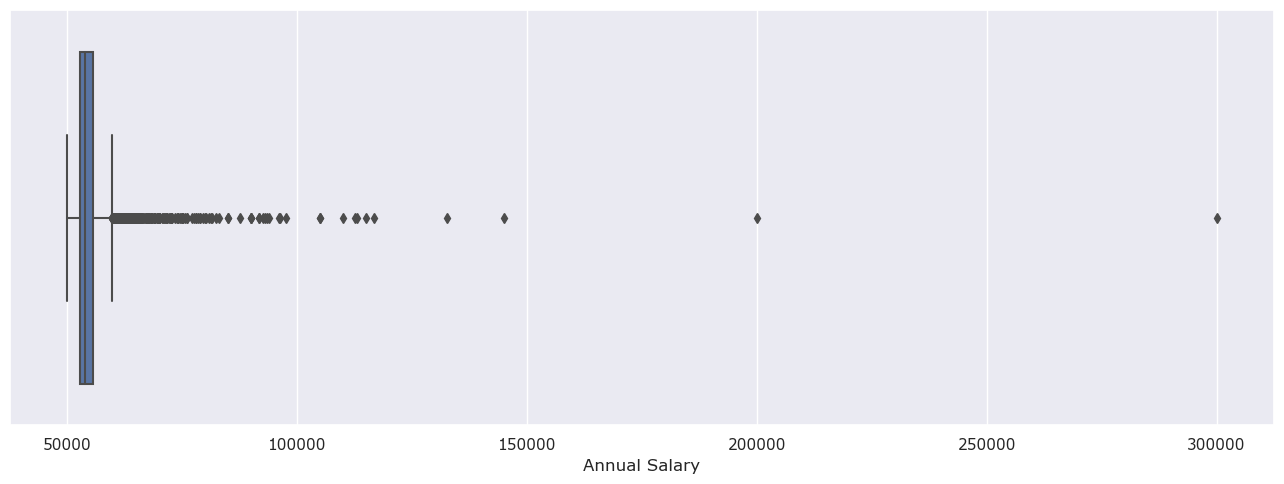

In [157]:
fig, ax = plt.subplots(figsize=(13,5))
ax = sns.boxplot(x=df['Annual Salary'])
ax.set_xticklabels(np.arange(0,750000,50000))
plt.tight_layout()

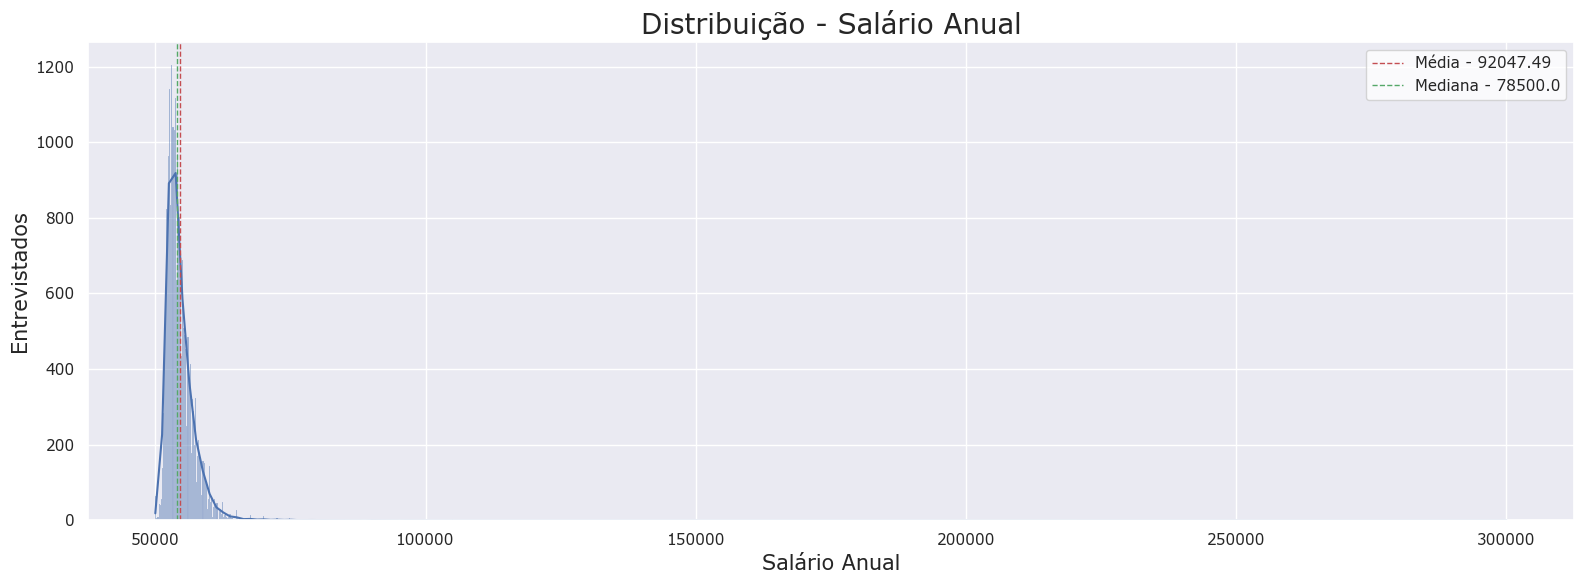

In [158]:
fig, ax = plt.subplots(figsize=(16,6))
sns.set_theme(style='white', font='verdana')
ax = sns.histplot(x=df['Annual Salary'], kde=True)
mean =  'Média - ' + str(round(df['Annual Salary'].mean(), 2))
median =  'Mediana - ' + str(round(df['Annual Salary'].median(), 2))
ax.axvline(df['Annual Salary'].mean(), color='r', ls='--', lw=1, label=mean)
ax.axvline(df['Annual Salary'].median(), color='g', ls='--', lw=1, label=median)
ax.set_title('Distribuição - Salário Anual', fontsize=20)
ax.set_xlabel('Salário Anual', fontsize=15)
ax.set_ylabel('Entrevistados', fontsize=15)
ax.set_xticklabels(np.arange(0,500000,50000))
plt.legend(loc='upper right')

plt.tight_layout()

## 

In [159]:
#Salvar para fazer os tratamentos finais e o modelo de ML.
df.to_csv('Projeto_1_ML.csv', index=False)